# NoteBook Portafolio de Inversion

### Lectura de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.optimize import minimize
import scipy.stats as stats

In [2]:
import yfinance as yf
import pandas as pd

# Lista de símbolos de acciones
symbols = ['AAPL', 'AMZN', 'BAC', 'C', 'F', 'GE', 'JNJ', 'JPM', 'NU', 'PFE', 'UBER', ]

# Crear un diccionario para almacenar los datos de cierre de cada acción
historical_data = {}

# Obtener los datos históricos de cierre para cada símbolo
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    historical_data[symbol] = ticker.history(period='1y')['Close']

# Crear un DataFrame a partir del diccionario
df_inicial = pd.DataFrame(historical_data)

df_inicial.tail(5)




,AAPL,AMZN,BAC,C,F,GE,JNJ,JPM,NU,PFE,UBER
Date,,,,,,,,,,,
2024-03-12 00:00:00-04:00,173.229996,175.389999,35.959999,57.450001,12.11,167.460007,162.740005,189.839996,11.41,28.010000,78.320000
2024-03-13 00:00:00-04:00,171.130005,176.559998,36.080002,57.759998,12.37,170.160004,161.100006,191.380005,11.59,28.219999,78.250000
2024-03-14 00:00:00-04:00,173.000000,178.750000,35.689999,57.090000,12.08,166.750000,159.210007,187.970001,11.62,28.129999,77.650002
2024-03-15 00:00:00-04:00,172.619995,174.419998,35.410000,57.610001,12.06,168.889999,158.179993,190.300003,11.61,27.940001,76.070000
2024-03-18 00:00:00-04:00,173.720001,174.479996,36.009998,58.630001,12.18,169.910004,156.759995,192.660004,11.79,27.719999,75.699997


In [3]:
#Si se desea excluir alguna accion por conocimiento Mercado

df_inicial = df_inicial.drop('BAC', axis=1)
df_inicial = df_inicial.drop('NU', axis=1)

In [4]:
print(df_inicial.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-20 00:00:00-04:00 to 2024-03-18 00:00:00-04:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    251 non-null    float64
 1   AMZN    251 non-null    float64
 2   C       251 non-null    float64
 3   F       251 non-null    float64
 4   GE      251 non-null    float64
 5   JNJ     251 non-null    float64
 6   JPM     251 non-null    float64
 7   PFE     251 non-null    float64
 8   UBER    251 non-null    float64
dtypes: float64(9)
memory usage: 19.6 KB
None


<Figure size 1000x600 with 0 Axes>

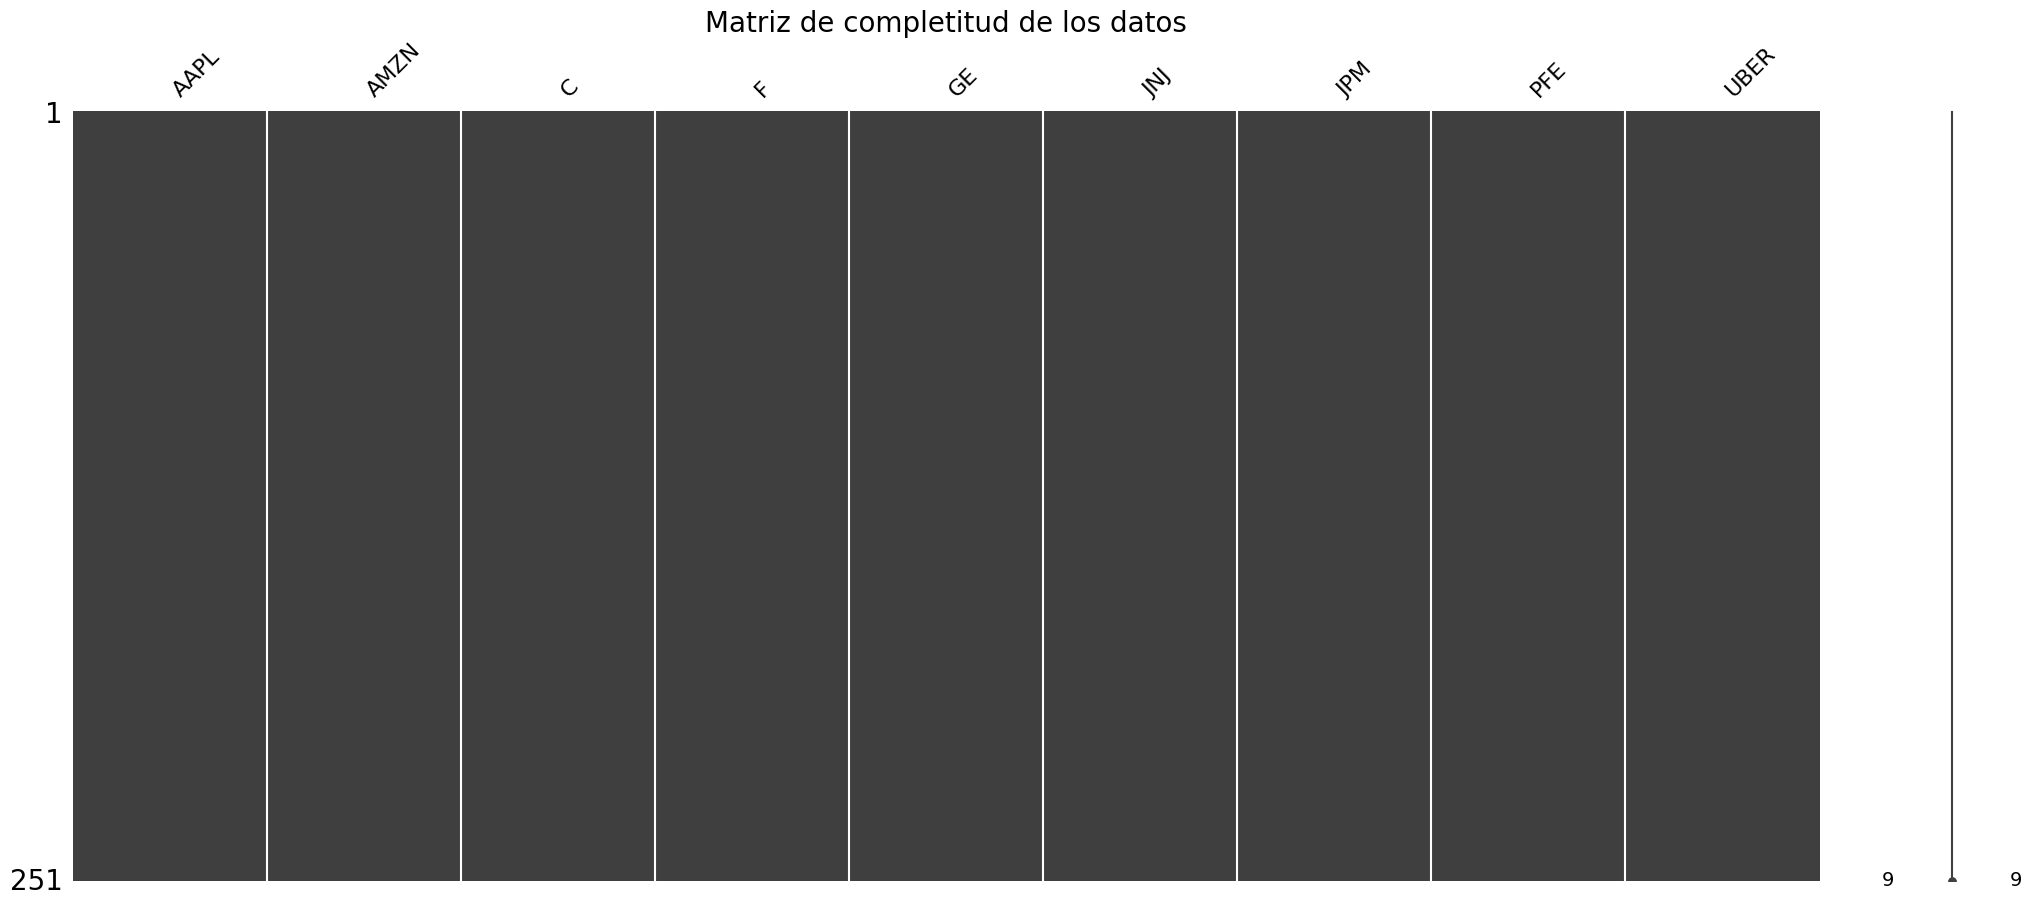

c:\Users\yjimenez\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\cluster\hierarchy.py:2820: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Figure size 1000x600 with 0 Axes>

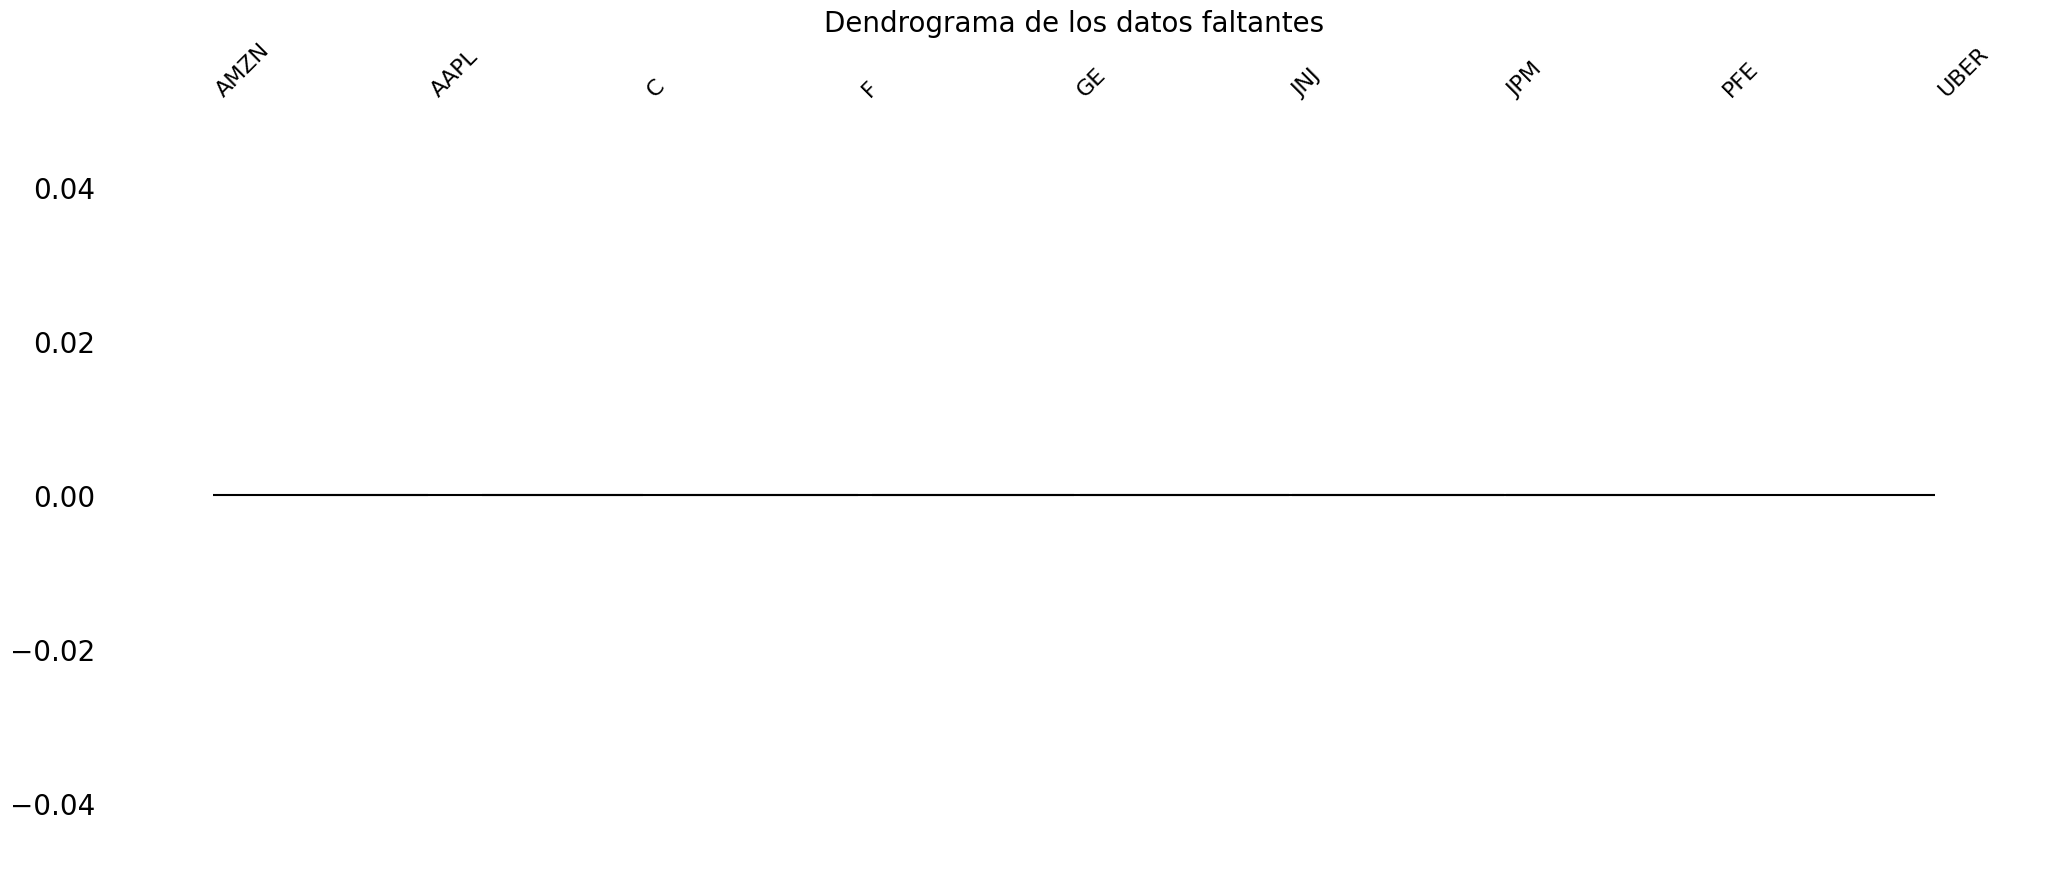

AAPL    0
AMZN    0
C       0
F       0
GE      0
JNJ     0
JPM     0
PFE     0
UBER    0
dtype: int64


In [5]:
# Visualizar la completitud de los datos con matriz
plt.figure(figsize=(10,6))
msno.matrix(df_inicial)
plt.title('Matriz de completitud de los datos', fontsize=20)
plt.show()

# Agrupar las columnas con datos faltantes similares con dendrograma
plt.figure(figsize=(10,6))
msno.dendrogram(df_inicial)
plt.title('Dendrograma de los datos faltantes', fontsize=20)
plt.show()

# Resumen de la cantidad de datos faltantes por columna
print(df_inicial.isnull().sum())


Calcular la matriz de correlación

In [6]:
correlacion = df_inicial.corr()
correlacion

,AAPL,AMZN,C,F,GE,JNJ,JPM,PFE,UBER
AAPL,1.000000,0.567049,0.293228,0.236162,0.360778,0.167703,0.486465,-0.497076,0.506739
AMZN,0.567049,1.000000,0.674013,0.059959,0.936324,0.156283,0.934432,-0.871310,0.964058
C,0.293228,0.674013,1.000000,0.216313,0.781956,0.248185,0.824237,-0.528459,0.775409
F,0.236162,0.059959,0.216313,1.000000,0.093497,0.509046,0.118923,0.242757,0.037487
GE,0.360778,0.936324,0.781956,0.093497,1.000000,0.200883,0.960965,-0.801314,0.962059
JNJ,0.167703,0.156283,0.248185,0.509046,0.200883,1.000000,0.281456,0.151718,0.123826
JPM,0.486465,0.934432,0.824237,0.118923,0.960965,0.281456,1.000000,-0.821476,0.959780
PFE,-0.497076,-0.871310,-0.528459,0.242757,-0.801314,0.151718,-0.821476,1.000000,-0.879729
UBER,0.506739,0.964058,0.775409,0.037487,0.962059,0.123826,0.959780,-0.879729,1.000000


Grafico de Correlacion

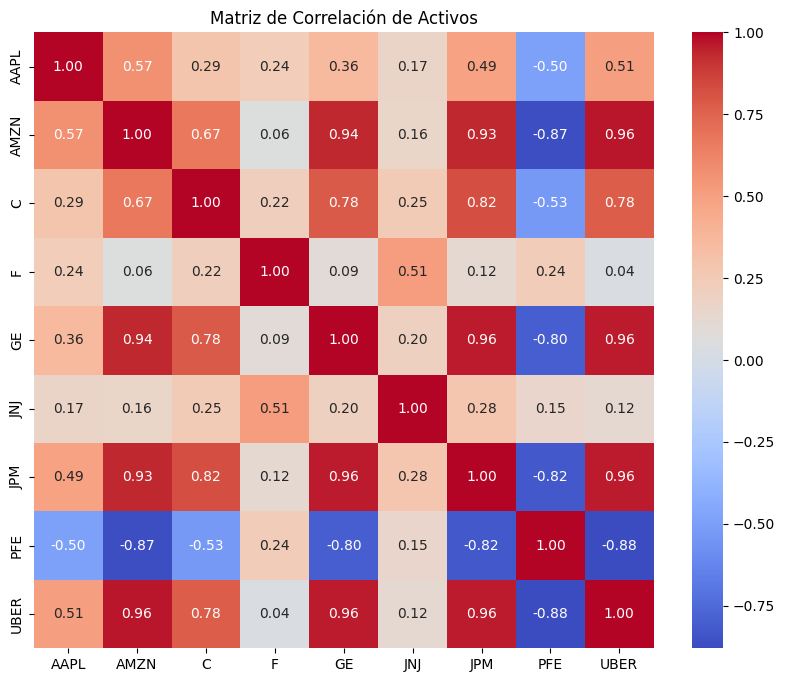

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos')
plt.show()


                                 AAPL          C         JNJ         JPM  \
Date                                                                       
2023-03-20 00:00:00-04:00  156.564301  42.156742  149.298386  123.609589   
2023-03-21 00:00:00-04:00  158.434326  43.093773  149.298386  126.924911   
2023-03-22 00:00:00-04:00  156.992020  41.793400  146.543137  123.648483   
2023-03-23 00:00:00-04:00  158.086166  41.544804  146.620728  123.317917   
2023-03-24 00:00:00-04:00  159.399170  41.219711  148.095398  121.441528   

                                 PFE  
Date                                  
2023-03-20 00:00:00-04:00  38.813042  
2023-03-21 00:00:00-04:00  38.670380  
2023-03-22 00:00:00-04:00  38.052185  
2023-03-23 00:00:00-04:00  38.213867  
2023-03-24 00:00:00-04:00  38.413593  


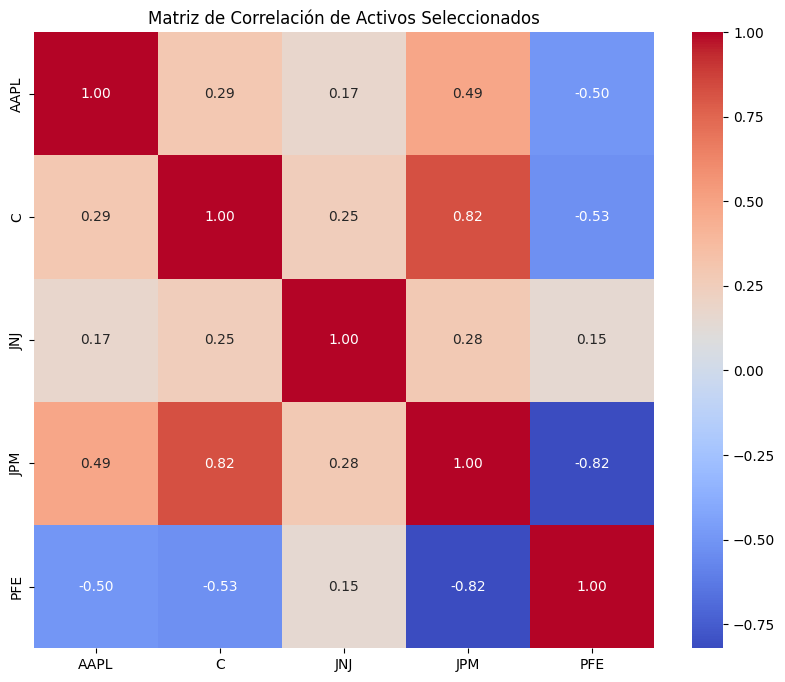

In [8]:
# Seleccionar las variables con correlación cercana a cero
low_corr_vars = correlacion[(correlacion > -0.1) & (correlacion < 0.1)].sum().sort_values().index[:5]

# Obtener el subconjunto de variables no correlacionadas
df_sincorrelacion = df_inicial[low_corr_vars]

# Mostrar las variables seleccionadas
print(df_sincorrelacion.head())

# Visualizar la nueva matriz de correlación de las variables seleccionadas
plt.figure(figsize=(10, 8))
sns.heatmap(df_sincorrelacion.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Activos Seleccionados')
plt.show()


Calculo de la volatilidad simple

AAPL    0.054532
AMZN    0.087211
C       0.065840
F       0.096446
GE      0.063806
JNJ     0.045602
JPM     0.050917
PFE     0.068018
UBER    0.105082
dtype: float64


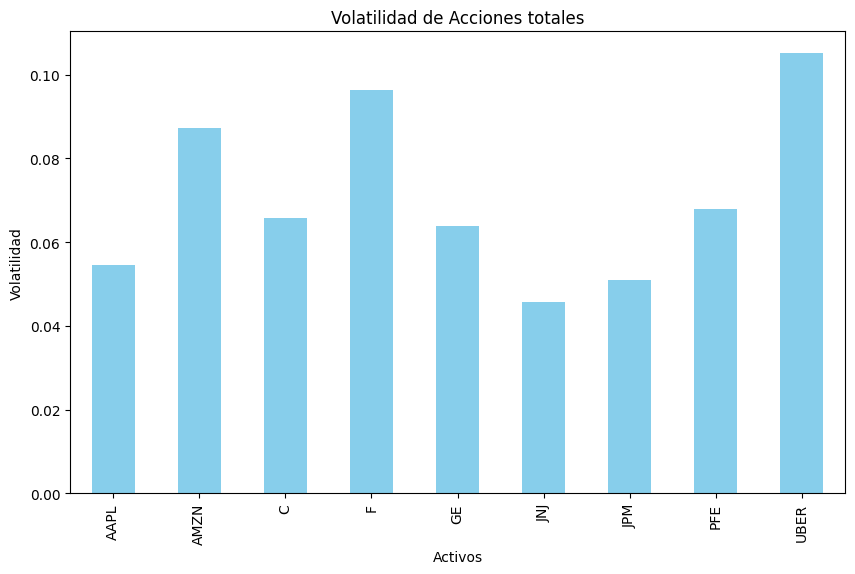

In [9]:
# Calcula los rendimientos diarios
returns = df_inicial.pct_change()

# Calcula la volatilidad como la desviación estándar de los rendimientos diarios expresado en un horizonte Mes
volatilidad = returns.std() * np.sqrt(21)

# Mostrar la volatilidad de cada activo
print(volatilidad)


#Gráfica la volatilidad
volatilidad.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Activos')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Acciones totales')
plt.show()

AAPL    0.054532
C       0.065840
JNJ     0.045602
JPM     0.050917
PFE     0.068018
dtype: float64


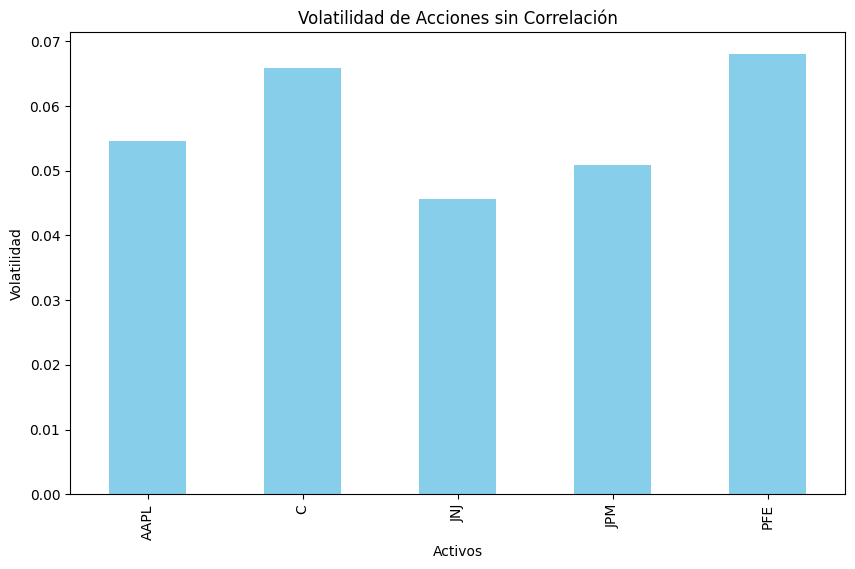

In [10]:
# Calcula los rendimientos diarios sin acciones correlacionadas
returns = df_sincorrelacion.pct_change()

# Calcula la volatilidad como la desviación estándar de los rendimientos diarios expresado en un horizon Mes
volatilidad = returns.std() * np.sqrt(21)

# Mostrar la volatilidad de cada activo
print(volatilidad)


# Suponiendo que tienes la volatilidad calculada en una Serie llamada "volatility"
volatilidad.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Activos')
plt.ylabel('Volatilidad')
plt.title('Volatilidad de Acciones sin Correlación')
plt.show()

Análisis de volatilidad y rendimiento desde formulacion en python

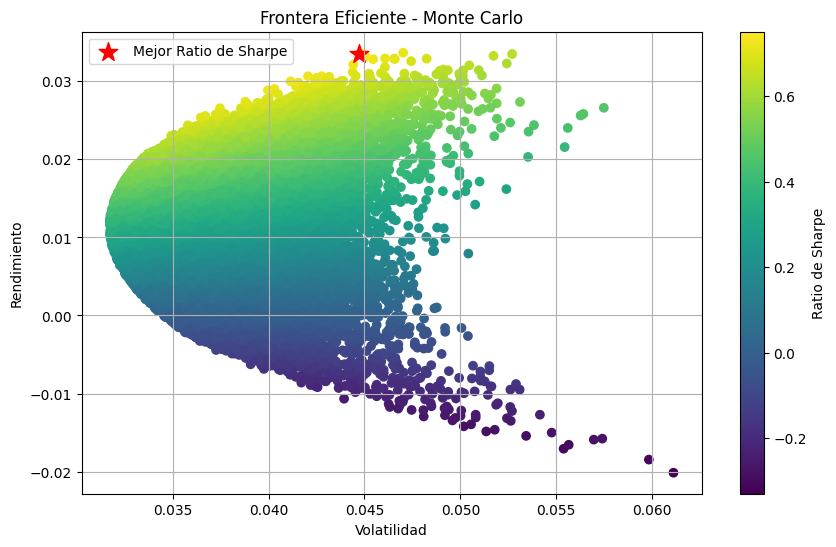

In [11]:
# Calcular los rendimientos diarios
returns = df_sincorrelacion.dropna().pct_change()

# Calcular la matriz de covarianza
cov_matrix = returns.cov()

# Número de simulaciones de Monte Carlo
num_portfolios = 50000

# Almacenar los resultados de rendimiento y volatilidad
results = np.zeros((3, num_portfolios))

# Simular múltiples portafolios
for i in range(num_portfolios):
    # Generar pesos aleatorios
    pesos = np.random.random(len(df_sincorrelacion.columns))
    pesos /= np.sum(pesos)  # Normalizar para que la suma sea 1

    # Calcular rendimiento y volatilidad horizonte tiempo 1 mes
    portfolio_return = np.sum(returns.mean() * pesos) * 21
    portfolio_volatility = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos))) * np.sqrt(21)

    # Almacenar rendimiento, volatilidad y pesos
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = portfolio_return / portfolio_volatility  # Ratio de Sharpe

# Encontrar el portafolio con el mejor ratio de Sharpe
max_sharpe_index = np.argmax(results[2])
best_return = results[0, max_sharpe_index]
best_volatility = results[1, max_sharpe_index]

# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Ratio de Sharpe')
plt.scatter(best_volatility, best_return, marker='*', color='r', s=200, label='Mejor Ratio de Sharpe')
plt.title('Frontera Eficiente - Monte Carlo')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Mostrar los pesos óptimos del portafolio con el mejor ratio de Sharpe
mejores_pesos = np.round(np.array([pesos]), 4)
print("Pesos óptimos del portafolio con el mejor ratio de Sharpe:")
for i in range(len(df_sincorrelacion.columns)):
    print(df_sincorrelacion.columns[i], ":", mejores_pesos[0, i])

print('------------------------------------')
print('Rendimientos del Portafololio')

# calcular el rendimiento y volatilidad del portafolio óptimo
Radio_de_sharpe = best_return/best_volatility
print(f"Rendimiento óptimo: {best_return * 100:.2f}%")
print(f"Volatilidad óptima: {best_volatility * 100:.2f}%")
print(f"Rendimiento de Sharpe: {Radio_de_sharpe}")

Pesos óptimos del portafolio con el mejor ratio de Sharpe:
AAPL : 0.1575
C : 0.0306
JNJ : 0.292
JPM : 0.2368
PFE : 0.2831
------------------------------------
Rendimientos del Portafololio
Rendimiento óptimo: 3.35%
Volatilidad óptima: 4.47%
Rendimiento de Sharpe: 0.7499872680734878


In [13]:
# Crear un DataFrame con los pesos óptimos
portafolio_optimo = pd.DataFrame(data=mejores_pesos, columns=df_sincorrelacion.columns)

# Transponer el DataFrame para que los activos estén en filas y los pesos en columnas
portafolio_optimo = portafolio_optimo.T

# Renombrar la columna de los pesos
portafolio_optimo.columns = ['Peso']

# Agregar la volatilidad al DataFrame de pesos
portafolio_optimo['Volatilidad'] = volatilidad

# Mostrar el DataFrame resultante
print(portafolio_optimo)

        Peso  Volatilidad
AAPL  0.1575     0.054532
C     0.0306     0.065840
JNJ   0.2920     0.045602
JPM   0.2368     0.050917
PFE   0.2831     0.068018


In [14]:
# Solicitar la inversión al usuario
inversion = float(input("Ingrese el monto de la inversión: "))

# Multiplicar la inversión por cada peso en el DataFrame de pesos
portafolio_optimo['Inversión'] = portafolio_optimo['Peso'] * inversion

# Mostrar el DataFrame con la inversión y la volatilidad por cada activo
print(portafolio_optimo)

        Peso  Volatilidad  Inversión
AAPL  0.1575     0.054532   157500.0
C     0.0306     0.065840    30600.0
JNJ   0.2920     0.045602   292000.0
JPM   0.2368     0.050917   236800.0
PFE   0.2831     0.068018   283100.0


In [15]:
# Calcular el VaR
confianza = 0.99
z_score = stats.norm.ppf(confianza)
var = z_score * portafolio_optimo['Inversión'] * portafolio_optimo['Volatilidad'] * np.sqrt(1/21)

# Agregar el VaR al DataFrame de portafolio_optimo
portafolio_optimo['VaR'] = var

# Redondear el VaR a a decimales
portafolio_optimo['VaR'] = portafolio_optimo['VaR'].apply(lambda x: round(x, 1))

# Mostrar el DataFrame con el VaR redondeado por cada activo y la suma total al final
print(portafolio_optimo)

        Peso  Volatilidad  Inversión     VaR
AAPL  0.1575     0.054532   157500.0  4360.1
C     0.0306     0.065840    30600.0  1022.8
JNJ   0.2920     0.045602   292000.0  6759.7
JPM   0.2368     0.050917   236800.0  6120.8
PFE   0.2831     0.068018   283100.0  9775.3


In [16]:
# Sumar la columna 'VaR'
sumVar = portafolio_optimo['VaR'].sum()

# Calcular el riesgo del portafolio como un porcentaje
riesgo_portafolio = (sumVar / inversion)
riesgo_perdida = (inversion * riesgo_portafolio)
print("El Riesgo del Portafolio es: ", riesgo_portafolio,)
print("El Riesgo de perdida es: ", riesgo_perdida,)


El Riesgo del Portafolio es:  0.0280387
El Riesgo de perdida es:  28038.7
